In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#pd.set_option('display.max_columns', None)

In [64]:
data = pd.read_csv('learningSet.csv')

C:\Users\Denish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
Y = data[['TARGET_B', 'TARGET_D']]


In [66]:
data_num = data.select_dtypes(exclude = "object")
data_num = data_num.drop(columns = ['TARGET_B', 'TARGET_D'])
data_num.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


# Categorial Columns

In [67]:
data_cat = data.select_dtypes(include = "object")
data_cat.shape

(95412, 74)

# Check for null values in all the columns

In [68]:
nulls_percent_df = pd.DataFrame(data_cat.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,OSOURCE,0.000000
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.000000
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [69]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.50]
columns_above_threshold['column_name'] # no columns have missing values greater than 50%

Series([], Name: column_name, dtype: object)

In [70]:
#data_cat.drop(drop_list,axis =1, inplace = True)

# Data Cleaning (Same as class)

In [71]:
data_cat['MAILCODE'].value_counts()
data_cat['MAILCODE'] = data_cat['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

<ipython-input-71-a7f7ee206c07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['MAILCODE'] = data_cat['MAILCODE'].apply(lambda x: x.replace(" ", "A"))


In [72]:
data_cat = data_cat.apply(lambda x: x.replace(" ", np.NaN))


In [73]:
nulls_percent_df = pd.DataFrame(data_cat.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.50] 
print(len(columns_above_threshold["column_name"]))

36


In [74]:

data_cat.drop(data_cat[columns_above_threshold["column_name"]],axis =1, inplace =True)

In [75]:
data_cat.shape

(95412, 38)

In [76]:
# working on the state column

In [77]:
df = pd.DataFrame(data_cat['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
data_cat['STATE'] = list(map(clean_state, data_cat['STATE']))

In [78]:
# working on Gender column

In [79]:
print(data_cat['GENDER'].value_counts())
data_cat['GENDER'] = data_cat['GENDER'].fillna('F')

F    51277
M    39094
U     1715
J      365
A        2
C        2
Name: GENDER, dtype: int64


In [80]:
other_category = ["U","J","A","C"]
def clean_gender(x):
    if x in other_category:
        return 'other'
    else:
        return x
data_cat['GENDER'] = list(map(clean_gender,data_cat["GENDER"]))    

In [81]:
#data_cat['DOMAIN'].value_counts(dropna=False)

In [82]:
data_cat['DOMAIN'] = data_cat['DOMAIN'].fillna('R2')
data_cat['DOMAIN_A'] = list(map(lambda x: x[0], data_cat['DOMAIN']))
data_cat['DOMAIN_B'] = list(map(lambda x: x[1], data_cat['DOMAIN']))
data_cat = data_cat.drop(columns=['DOMAIN'])

In [83]:
data_cat['CLUSTER'].sort_values().unique()
data_cat['CLUSTER'] = data_cat['CLUSTER'].fillna('40')

In [84]:
data_cat['HOMEOWNR'].value_counts(dropna=False)
data_cat['HOMEOWNR'] = data_cat['HOMEOWNR'].fillna('N')

In [85]:
data_cat['DATASRCE'] = data_cat['DATASRCE'].fillna('0') 

In [86]:
data_cat['GEOCODE2'] = data_cat['GEOCODE2'].fillna('A')

In [87]:
drop_list = []
# We will keep the column RFA_2X. We will delete rest of the columns 
for col_name in data_cat.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)    

In [88]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
#drop_list

In [89]:
# data_cat = data_cat.drop(columns=drop_list)
# data_cat.head()

In [90]:
data_cat['NOEXCH'].value_counts(dropna = False)
drop_list.append('NOEXCH')

In [91]:
#data_cat['MDMAUD'].value_counts()
# Since most of the data is unknown (XXXX) here we will drop this column

In [92]:
drop_list.append('MDMAUD')

In [93]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [94]:
data_cat['DATASRCE'] = data_cat['DATASRCE'].fillna('0')

In [95]:
data_cat['GEOCODE2'] = data_cat['GEOCODE2'].fillna('A')

In [96]:
for col_name in data_cat.columns:
    if "RFA" in col_name:
        drop_list.append(col_name) 

In [97]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')


In [98]:
data_cat = data_cat.drop(columns=['OSOURCE', 'ZIP'])


In [99]:
data_cat.drop("AGEFLAG",axis =1,inplace = True)

In [100]:
data_cat = data_cat.drop(columns=drop_list)
data_cat.head()

,STATE,MAILCODE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,36,N,F,0,L,E,C,T,2
1,CA,A,14,H,M,3,L,G,A,S,1
2,NC,A,43,U,M,3,L,E,C,R,2
3,CA,A,44,U,F,3,L,E,C,R,2
4,FL,A,16,H,F,3,L,F,A,S,2


# data_cat (csv file)

In [101]:
data_cat.to_csv('categorical7_02.csv', index=False)
#data_cat.to_pickle('categorical7_02.p')

# Numerical Columns

In [102]:
# cols_2 = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']
# for item in cols_2:
#      drop_columns_list_2.remove(item) 
# data = data.drop(columns=drop_columns_list_2)
# data.shape 

In [103]:
import sys
print(sys.getrecursionlimit())

3000


In [104]:
#sys.setrecursionlimit(3000)

In [105]:
df = pd.DataFrame(data_num.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973


# the ADATE_* column

In [106]:
drop_list_num = []
for i in data_num.columns:
    if "ADATE" in i:
        drop_list_num.append(i)

In [107]:
data_num['AGE'] = data_num["AGE"].fillna(np.mean(data_num['AGE']))
data_num['INCOME'] = data_num['INCOME'].astype(object)
data_num['INCOME'] = data_num['INCOME'].fillna(5.0)
data_num['CLUSTER2'] = data_num['CLUSTER2'].fillna(np.ceil(np.mean(data_num['CLUSTER2'])))
data_num['WEALTH2'] = data_num['WEALTH2'].astype('object')
data_num['WEALTH2'] = data_num['WEALTH2'].fillna('5.0') # median
data_num['TIMELAG'] = data_num['TIMELAG'].fillna(0.0)

In [108]:
data_num = data_num.drop(columns=drop_list_num)

In [109]:
data_num

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,NaN,5.0,NaN,0,NaN,NaN,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0.0,0.0,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,NaN,3.0,1.0,2,0.0,0.0,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,NaN,1.0,4.0,2,0.0,0.0,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,1.0,3.0,2.0,60,1.0,0.0,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,NaN,5.0,NaN,0,NaN,NaN,...,25.0,9602,9602,NaN,0.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,1.0,7.0,9.0,1,0.0,0.0,...,20.0,9603,9603,NaN,0.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,NaN,5.0,NaN,0,NaN,NaN,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,NaN,7.0,NaN,0,NaN,NaN,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


In [110]:
nulls_percent_num = pd.DataFrame(data_num.isna().sum()/len(data)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_above_threshold_num = nulls_percent_num[nulls_percent_num['nulls_percentage']>0.50] 

In [111]:
print(len(columns_above_threshold_num["column_name"]))
data_num.drop(data_num[columns_above_threshold_num["column_name"]],axis =1, inplace =True)



59


In [112]:
data_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,NaN,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,NaN,0,14,36,47,...,25.0,9602,9602,NaN,0.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,20.0,9603,9603,NaN,0.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,5.0,NaN,0,0,18,46,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,NaN,0,0,28,35,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


# finding other columns with null values

In [113]:
# import sys
# sys.setrecursionlimit(10000) 

In [114]:
data_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,NaN,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,NaN,0,14,36,47,...,25.0,9602,9602,NaN,0.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,20.0,9603,9603,NaN,0.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,5.0,NaN,0,0,18,46,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,NaN,0,0,28,35,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


In [115]:
# data_num.isna().sum()[data_num.isna().sum() != 0]
# null_value = pd.DataFrame(columns_with_missing_values) 
# null_value

In [116]:
columns_with_missing_values =data_num.isna().sum()[data_num.isna().sum() != 0]
null_value = pd.DataFrame(columns_with_missing_values) 
null_value.columns = ["null Value"]
null_value["%_Null_Value"] = null_value["null Value"]*100/len(data)
print(null_value)
data_num['WEALTH1'] = data_num['WEALTH1'].astype('object')
data_num['WEALTH1'] = data_num['WEALTH1'].fillna(data_num['WEALTH1'].median()) 
data_num["MSA"] = data_num["MSA"].fillna(data_num["MSA"].mean())
#data_num["MSA"] = data_num["MSA"].fillna(0)
data_num["ADI"] = data_num["ADI"].fillna(13)
data_num["DMA"] = data_num["DMA"].fillna(data_num["DMA"].mean())
data_num["NEXTDATE"] = data_num["NEXTDATE"].fillna(0)

          null Value  %_Null_Value
WEALTH1        44732     46.882992
MSA              132      0.138347
ADI              132      0.138347
DMA              132      0.138347
NEXTDATE        9973     10.452564


In [117]:
type(data_num)

pandas.core.frame.DataFrame

In [118]:
#sns.displot(data_num["MSA"]) # here we can see that MSA = 0,occur most of the time so i will replace null value with 0

In [119]:
data_num["MSA"].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
8003.0        1
1320.0        1
1950.0        1
5660.0        1
743.0         1
Name: MSA, Length: 299, dtype: int64

In [120]:
data_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,6.0,0,14,36,47,...,25.0,9602,9602,0.0,0.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,20.0,9603,9603,0.0,0.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,5.0,6.0,0,0,18,46,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,6.0,0,0,28,35,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


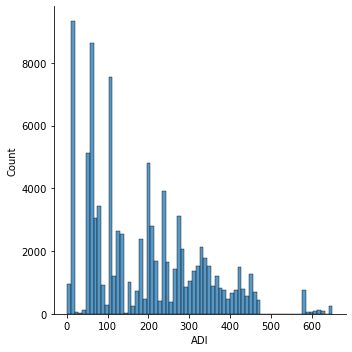

In [121]:
sns.displot(data_num["ADI"])

In [122]:
data_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,6.0,0,14,36,47,...,25.0,9602,9602,0.0,0.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,20.0,9603,9603,0.0,0.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,5.0,6.0,0,0,18,46,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,6.0,0,0,28,35,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


In [123]:
data_num.to_csv('numerical7_02.csv', index=False)